Import the "cpu-performance" dataset, and relevant information.

In [1]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data -O
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.names -O
    

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  8726  100  8726    0     0   6827      0  0:00:01  0:00:01 --:--:--  6870
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2903  100  2903    0     0  10079      0 --:--:-- --:--:-- --:--:-- 10114


In [2]:
!cat machine.names

1. Title: Relative CPU Performance Data 

2. Source Information
   -- Creators: Phillip Ein-Dor and Jacob Feldmesser
     -- Ein-Dor: Faculty of Management; Tel Aviv University; Ramat-Aviv; 
        Tel Aviv, 69978; Israel
   -- Donor: David W. Aha (aha@ics.uci.edu) (714) 856-8779   
   -- Date: October, 1987
 
3. Past Usage:
    1. Ein-Dor and Feldmesser (CACM 4/87, pp 308-317)
       -- Results: 
          -- linear regression prediction of relative cpu performance
          -- Recorded 34% average deviation from actual values 
    2. Kibler,D. & Aha,D. (1988).  Instance-Based Prediction of
       Real-Valued Attributes.  In Proceedings of the CSCSI (Canadian
       AI) Conference.
       -- Results:
          -- instance-based prediction of relative cpu performance
          -- similar results; no transformations required
    - Predicted attribute: cpu relative performance (numeric)

4. Relevant Information:
   -- The estimated relative performance values were estimated by the autho

Import relevant libraries, read the data, and assign a variable to it.

In [3]:
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [4]:
machine = pd.read_csv('machine.data', names=['Vendor Name', 'Model Name', 'Machine Cycle Time (ns)', 'Min Main Memory (kb)', 'Max Main Memory (kb)', 'Cache Memory (kb)', 'Minimum Channels (units)', 'Maximum Channels(units)', 'Published Relative Performance', 'Estimated Relative Performance'])

In [5]:
machine.head()

,Vendor Name,Model Name,Machine Cycle Time (ns),Min Main Memory (kb),Max Main Memory (kb),Cache Memory (kb),Minimum Channels (units),Maximum Channels(units),Published Relative Performance,Estimated Relative Performance
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [6]:
machine.shape

(209, 10)

Cleaning the dataset

In [7]:
# Check for any null values
machine.isnull().values.any()

False

In [8]:
# Get a summary of the dataset
machine.describe()

,Machine Cycle Time (ns),Min Main Memory (kb),Max Main Memory (kb),Cache Memory (kb),Minimum Channels (units),Maximum Channels(units),Published Relative Performance,Estimated Relative Performance
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010,99.330144
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733,154.757102
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000,101.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


In [9]:
# Check the types of the values in each column.
machine.dtypes
# All values seem to be of the right type.

Vendor Name                       object
Model Name                        object
Machine Cycle Time (ns)            int64
Min Main Memory (kb)               int64
Max Main Memory (kb)               int64
Cache Memory (kb)                  int64
Minimum Channels (units)           int64
Maximum Channels(units)            int64
Published Relative Performance     int64
Estimated Relative Performance     int64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7f4ab90828>,
      dtype=object)

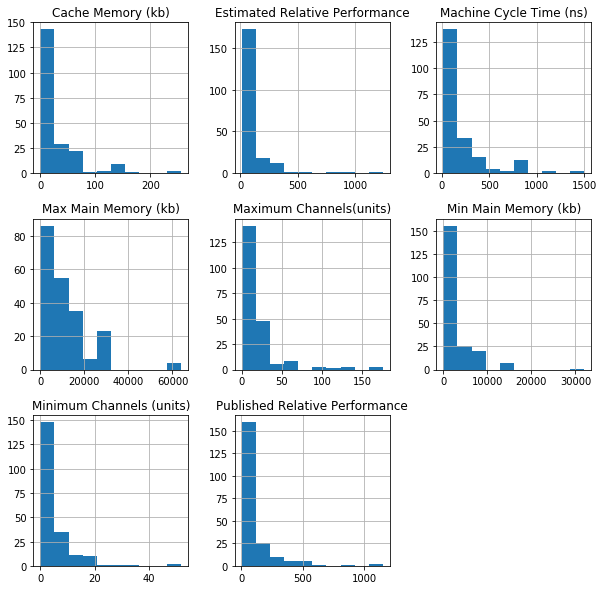

In [10]:
#Create histograms of each column.
machine.hist(figsize = (10,10))

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


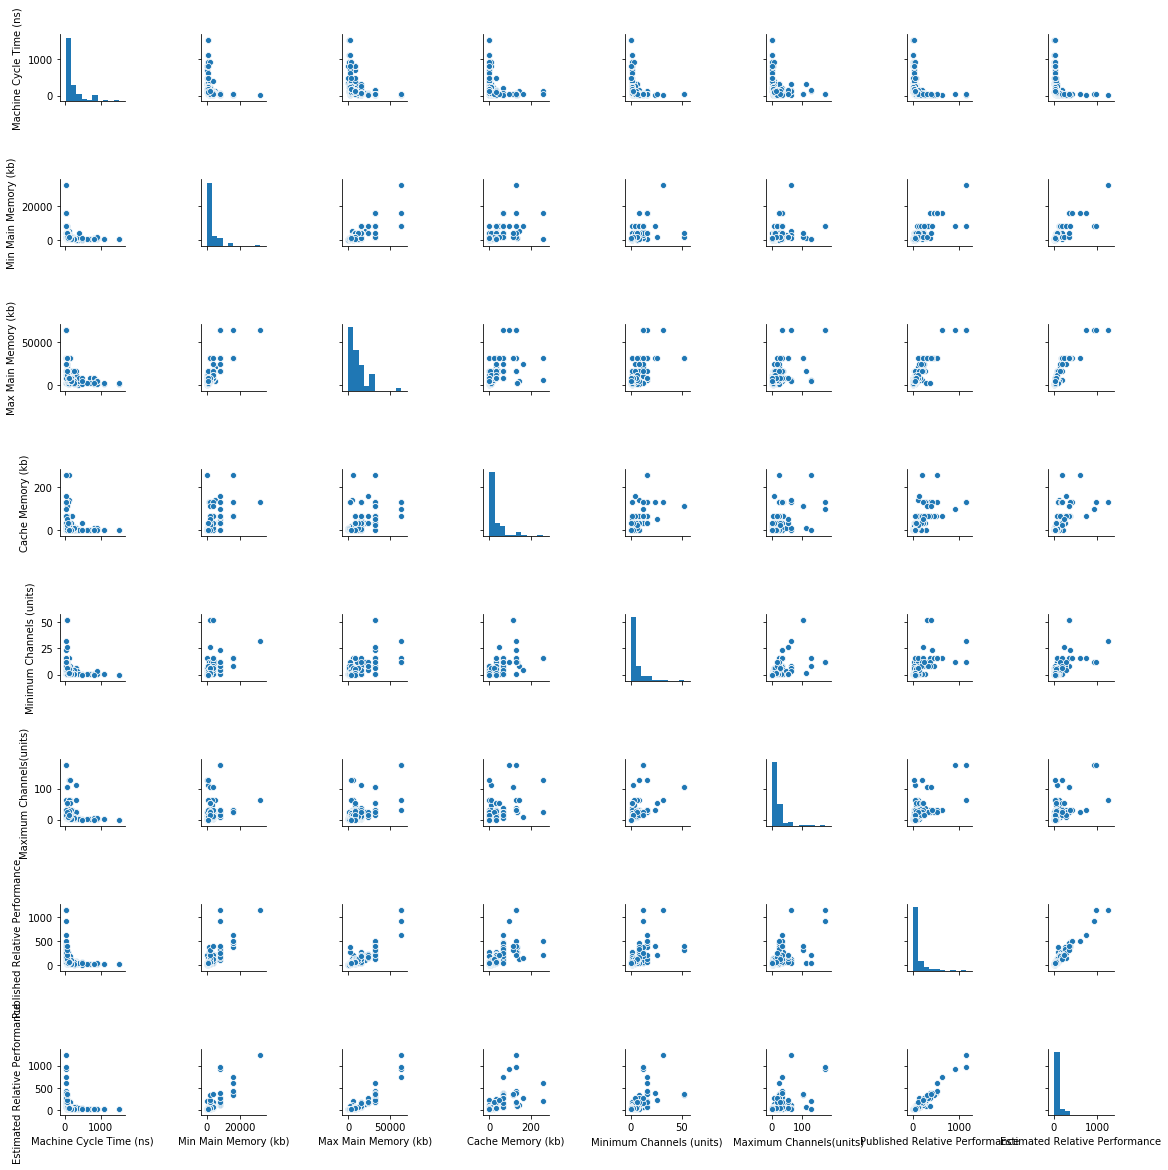

In [11]:
#View the relationship between different variables using scatterplots
sns.pairplot(machine, size = 2.0)

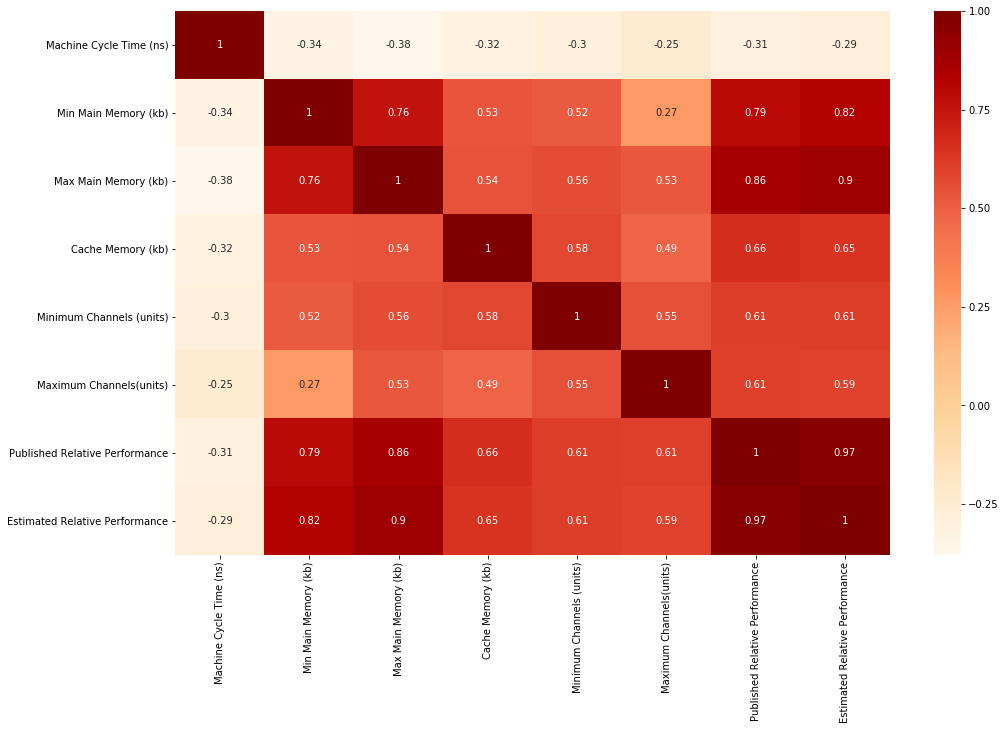

In [12]:
#Explore the relationship between variables further by viewing correlations between them.

ax, fig = plot.subplots(figsize=(16,10))
correlations = machine.corr()
sns.heatmap(correlations, annot=True, cmap="OrRd")
plot.show()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


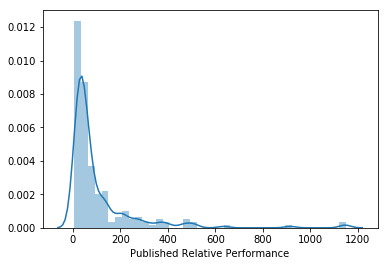

In [13]:
sns.distplot(machine['Published Relative Performance'])

In [14]:
from sklearn.model_selection import train_test_split

#Remove the "Estimated Relative Performance" from the dataset, since that the result of a previous prediction and would skew
#the results of this model.
#Also remove the vendor and model names because they are not numerical types.
machine = machine.drop(['Vendor Name', 'Model Name', 'Estimated Relative Performance'], axis=1)

In [15]:
# We want a model that predicts performance based on other factors, so y should consist of the performance column, and
# x should consist of every other column
x = machine.drop('Published Relative Performance', axis=1)
y = machine['Published Relative Performance']

In [16]:
x.head()

,Machine Cycle Time (ns),Min Main Memory (kb),Max Main Memory (kb),Cache Memory (kb),Minimum Channels (units),Maximum Channels(units)
0,125,256,6000,256,16,128
1,29,8000,32000,32,8,32
2,29,8000,32000,32,8,32
3,29,8000,32000,32,8,32
4,29,8000,16000,32,8,16


In [17]:
y.head()

0    198
1    269
2    220
3    172
4    132
Name: Published Relative Performance, dtype: int64

In [18]:
# Separate the x and y arrays into a training set and a testing set. The entries in each set are to be chosen randomly.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 42)

Linear Regression Model

In [19]:
from sklearn.linear_model import LinearRegression

#Initialise the linear regression model
linear_model = LinearRegression()

# Fit the model to our testing sets
linear_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
#Create a set of predicted values and compare it to the testing y-values

LM_pred = linear_model.predict(x_test)

linear_model.score(x_test, y_test)

0.7612361378207666

Text(0, 0.5, 'Actual Performance')

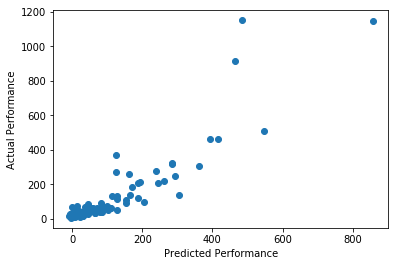

In [21]:
#Create a plot of the predicted values vs the actual values for performance

plot.scatter(LM_pred, y_test)
plot.xlabel('Predicted Performance')
plot.ylabel('Actual Performance')

Random Forest Regression Model

In [22]:
from sklearn.ensemble import RandomForestRegressor

# Create the model
forest_model = RandomForestRegressor()

# Fit the random forest model to the test sets.
forest_model.fit(x_test, y_test)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [23]:
#Create a set of predictions using the random forest model, and check the score for the model using the test values

RF_pred = forest_model.predict(x_train)

forest_model.score(x_train, y_train)

0.8542007886760259

Text(0.5, 1.0, 'Predictions for Random Forest Model (CPU Performance)')

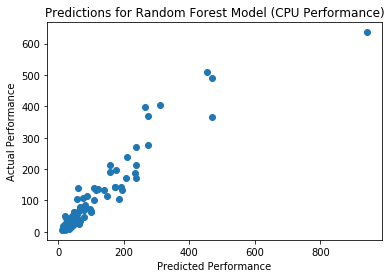

In [24]:
#Plot for predicted RF values vs actual values for performance.

plot.scatter(RF_pred, y_train)
plot.xlabel('Predicted Performance')
plot.ylabel('Actual Performance')
plot.title('Predictions for Random Forest Model (CPU Performance)')